In [47]:
# %% Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import cm
from sklearn.datasets import make_moons, make_circles, make_gaussian_quantiles

from models.load import get_classification_models
from experiments.evaluation import ModelEvaluationExperiment
from datasets.load import load_classification_datasets, print_stats

plt.style.use('ggplot')


In [48]:
# Construct gaussian quantiles dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X_q = np.concatenate((X1, X2))
y_q = np.concatenate((y1, - y2 + 1))
y_q = pd.Series(y_q).map({0:-1,1:1}).to_numpy()

# Moons dataset
X_m, y_m = make_moons(200, random_state=1234,noise=0.1)
y_m = pd.Series(y_m).map({0:-1,1:1}).to_numpy()

# Circles dataset
X_c, y_c = make_circles(200, noise=0.2, factor=0.5, random_state=1)
y_c = pd.Series(y_c).map({0:-1,1:1}).to_numpy()


In [54]:
models = get_classification_models()[1:]
cmap = cm.get_cmap('Accent', len(models))

In [59]:
def plot_toy_dataset(X, y, models):
    # and plot
    fig, ax = plt.subplots(figsize=(8,6))

    t_class0 = y == -1
    t_class1 = y == 1
    ax.scatter(X[t_class0, 0], X[t_class0, 1], color='red')
    ax.scatter(X[t_class1, 0], X[t_class1, 1], color='blue')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    x1 = np.arange(np.min(X[:,0])*0.9, np.max(X[:,0])*1.1, step=0.05)
    x2 = np.arange(np.min(X[:,1])*0.9, np.max(X[:,1])*1.1, step=0.05)

    xx, yy = np.meshgrid(x1, x2)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    # plot each decision boundary
    i = 0
    model_color = []
    for name, model, _ in models:
        model.fit(X, y) 
        y_hat = model.predict(grid)
        zz = y_hat.reshape(xx.shape)
        color = cmap(i)
        cs = ax.contour(xx, yy, zz, colors=[color])
        
        proxy = plt.Rectangle((0,0),1,1,fc=color)
        model_color.append((name, color, proxy))

        i = i + 1
    
    ax.legend([x[2] for x in model_color],[x[0] for x in model_color])
    fig.show()
    return model_color

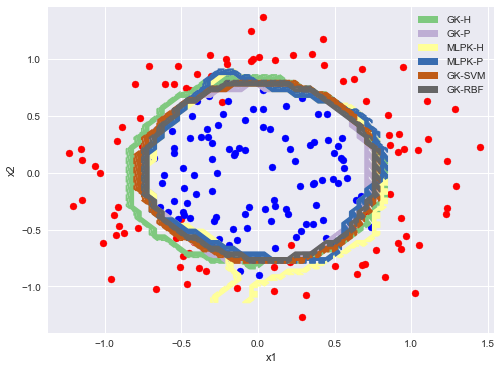

In [60]:
m_color_circles = plot_toy_dataset(X_c,y_c,models)

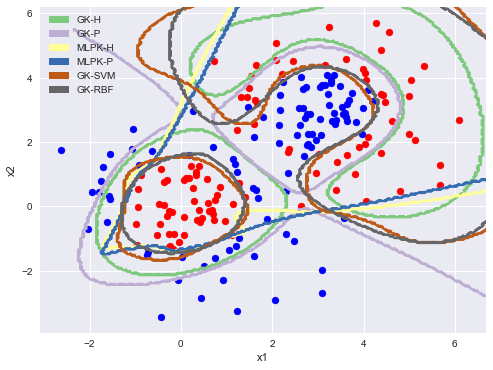

In [61]:
m_color_quantile = plot_toy_dataset(X_q,y_q,models)

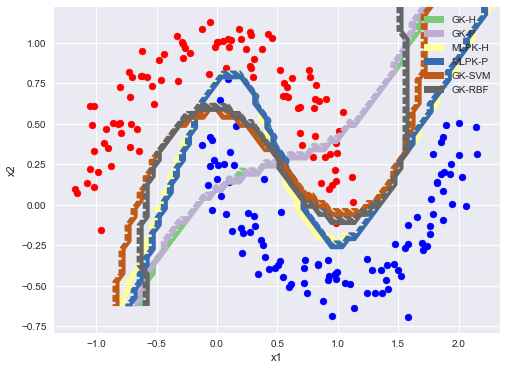

In [62]:
m_color_moons = plot_toy_dataset(X_m,y_m,models)